# Collect result data from training history files

In [1]:
result_folder = "exp_results_training_data_size/results_imagenette2"

In [2]:
import os
from os import listdir
from os.path import isdir, isfile, join

In [5]:
filenames = [result_folder + "/" + f
             for f in listdir(result_folder)
                 if isfile(join(result_folder, f)) and f.endswith(".history")]

In [19]:
filenames[:10]

['exp_results_training_data_size/results_imagenette2/exp_037_same-nr-filters_imagenette_500.history',
 'exp_results_training_data_size/results_imagenette2/exp_028_inc-nr-filters_imagenette_400.history',
 'exp_results_training_data_size/results_imagenette2/exp_094_inc-nr-filters_imagenette_600.history',
 'exp_results_training_data_size/results_imagenette2/exp_092_inc-nr-filters_imagenette_400.history',
 'exp_results_training_data_size/results_imagenette2/exp_027_inc-nr-filters_imagenette_300.history',
 'exp_results_training_data_size/results_imagenette2/exp_025_inc-nr-filters_imagenette_100.history',
 'exp_results_training_data_size/results_imagenette2/exp_032_inc-nr-filters_imagenette_800.history',
 'exp_results_training_data_size/results_imagenette2/exp_009_inc-nr-filters_imagenette_100.history',
 'exp_results_training_data_size/results_imagenette2/exp_002_same-nr-filters_imagenette_200.history',
 'exp_results_training_data_size/results_imagenette2/exp_090_inc-nr-filters_imagenette_20

In [23]:
import pickle
import matplotlib.pyplot as plt

all_exp_results = []

for filename in filenames:
    
    # 1. Read in the training/testing history from
    #    the .history file using pickle    
    fhandle = open(filename, "rb")
    history = pickle.load(fhandle)
    #print("history is of type {0}".format(type(history)))
    #print("history: {0}".format(history))
    fhandle.close()
    
    
    # 2. Get the training and testing classification rates
    tr_cl_rates = history["cl_rate_train"]
    tst_cl_rates = history["cl_rate_test"]
    # Show training / test classification rates as a graph?
    if False:
        plt.plot(tr_cl_rates)
        plt.plot(tst_cl_rates)
        plt.grid()
        plt.show()
        

    # 3. Get the final classification rate on the test data
    final_tst_cl_rate = tst_cl_rates[-1]
    #print("Nr of epochs: {0}".format(len(tr_cl_rates)))    
    
    
    # 4. Get the number of training samples used in this experiment
    #    from the filename
    nr_training_samples = int(filename[-11:-8])
        
    
    # 5. Get name of CNN model
    import re
    m = re.search('/exp_(.+?)-nr-filters', filename)
    cnn_model_name = m.group(1)
    cnn_model_name = cnn_model_name[4:]
    
    
    # 6. Compile a dictionary with the results for this experiment and store it in
    #    the list of all experiment results
    d = {"final_tst_cl_rate" : final_tst_cl_rate,
         "nr_training_samples" : nr_training_samples,
         "cnn_model_name": cnn_model_name}
    if len(all_exp_results)<10:
        print("\nData from {0}".format(filename))
        print(d)
    all_exp_results.append( d )
    
nr_experiments_conducted = len(all_exp_results)
print("\nI have collected results from {0} experiments".format(nr_experiments_conducted))
    


Data from exp_results_training_data_size/results_imagenette2/exp_037_same-nr-filters_imagenette_500.history
{'final_tst_cl_rate': 0.5011464968152867, 'nr_training_samples': 500, 'cnn_model_name': 'same'}

Data from exp_results_training_data_size/results_imagenette2/exp_028_inc-nr-filters_imagenette_400.history
{'final_tst_cl_rate': 0.566624203821656, 'nr_training_samples': 400, 'cnn_model_name': 'inc'}

Data from exp_results_training_data_size/results_imagenette2/exp_094_inc-nr-filters_imagenette_600.history
{'final_tst_cl_rate': 0.587515923566879, 'nr_training_samples': 600, 'cnn_model_name': 'inc'}

Data from exp_results_training_data_size/results_imagenette2/exp_092_inc-nr-filters_imagenette_400.history
{'final_tst_cl_rate': 0.5515923566878981, 'nr_training_samples': 400, 'cnn_model_name': 'inc'}

Data from exp_results_training_data_size/results_imagenette2/exp_027_inc-nr-filters_imagenette_300.history
{'final_tst_cl_rate': 0.5903184713375796, 'nr_training_samples': 300, 'cnn_model

# Plot the results

Average test classification rate: 0.56


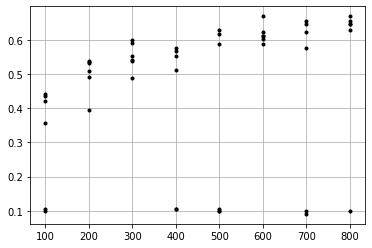

In [43]:
#filter_for_cnn = "same"
filter_for_cnn = "inc"

sum_working_models = 0.0
nr_working_models = 0
for exp_dict in all_exp_results:
    
    if exp_dict["cnn_model_name"] == filter_for_cnn:
        
        x = exp_dict["nr_training_samples"]
        y = exp_dict["final_tst_cl_rate"]
        
        plt.plot(x,y, marker=".", color="black")
        
        if y > 0.15:
            nr_working_models +=1
            sum_working_models += y            

avg_clf_rate = sum_working_models/nr_working_models
print("Average test classification rate: {0:0.2f}"
      .format(avg_clf_rate))

plt.grid()
plt.show()